In [1]:
import string
from collections import defaultdict
from itertools import islice


def compare_with_rotated(word):
    return word == word[::-1]


def two_pointers(word):
    lo = 0
    hi = len(word) - 1
    while lo < hi:
        if word[lo] != word[hi]:
            return False
        lo += 1
        hi -= 1
    return True


def compare_halfs(word):
    center = len(word) // 2
    return word[:center] == word[-1:-center-1:-1]


def startwith_reversed_tail(word):
    center = len(word) // 2
    return word.startswith(word[-1:-center-1:-1])


def pure_startwith_fully_rotated(word):
    return word.startswith(word[::-1])


def zip_eq_and_reversed(word):
    return all(x == y for x, y in zip(word, reversed(word)))


def zip_eq_and_reversed_slices(word):
    center = len(word) // 2
    return all(x == y for x, y in zip(islice(word, center), islice(reversed(word), center)))


In [2]:

functions = [
    compare_with_rotated,
    two_pointers,
    compare_halfs,
    zip_eq_and_reversed,
    zip_eq_and_reversed_slices,
    startwith_reversed_tail,
    pure_startwith_fully_rotated,
]

palindromes = {
    "Palindrome": "0123456789" * 250 + "9876543210" * 250,
    "Same char": "a" * 5000,
}

not_palindromes = {
    "Pair in a middle": "a" * 2499 + "bc" + "a" * 2499,
    "Pair at the end": "a" * 4999 + "b",
}


def validate_correctness():
    try:
        for fun in functions:
            for name, p in palindromes.items():
                assert fun(p)
            for name, np in not_palindromes.items():
                assert not fun(np)
    except Exception as e:
        print(f"Fail: {fun.__name__} with {name}")
        raise e


validate_correctness()

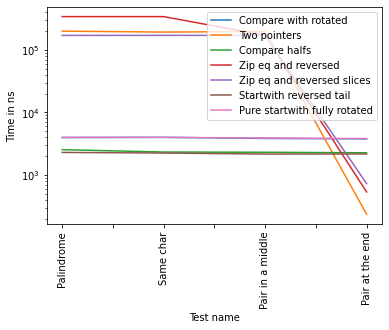

In [3]:
from timeit import timeit
import pandas as pd

words = dict(**palindromes, **not_palindromes)

def to_name(fun):
    return fun.__name__.replace("_", " ").capitalize()
 

def measure(repeats = 100):
    palindrome_measures = defaultdict(dict)
    
    for fun in functions:
        for name, word in words.items():
            context = {
                "main": lambda: fun(word)
            }
            total = timeit(stmt="main()", number=repeats, globals=context)
            palindrome_measures[to_name(fun)][name] = total / repeats * 10 ** 9

    return palindrome_measures


measured_data = pd.DataFrame(measure(1000))
plot = measured_data.plot.line(legend=True, rot=90)
plot.set(xlabel='Test name', ylabel='Time in ns')
plot.set_yscale('log')


In [4]:
print("Execution in nanosecond")
measured_data

Execution in nanosecond


,Compare with rotated,Two pointers,Compare halfs,Zip eq and reversed,Zip eq and reversed slices,Startwith reversed tail,Pure startwith fully rotated
Palindrome,3952.7,199540.8,2530.3,340826.5,170597.9,2284.5,3983.8
Same char,3984.7,192909.1,2319.1,340708.0,170791.5,2235.5,3978.5
Pair in a middle,3830.3,196769.8,2299.3,171074.7,170851.6,2153.3,3888.0
Pair at the end,3767.5,233.8,2253.9,532.9,723.7,2160.1,3815.4
